In [4]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

In [3]:
output_path = Path('/Users/shhong/Dropbox/network_data/output_ines')

srcs = np.load(output_path / 'AAtoGoCsources.npy')
tgts = np.load(output_path / 'AAtoGoCtargets.npy')
grcxy = np.loadtxt(output_path / 'GCcoordinates.sorted.dat')
gocxy = np.loadtxt(output_path / 'GoCcoordinates.sorted.dat')

df = dd.from_array(np.vstack((srcs, tgts)).T, columns=('src', 'tgt'))

NameError: name 'dd' is not defined

In [6]:
def convert_from_dd(x):
    temp = np.zeros(x.index.max()+1)
    temp[x.index] = x.values
    return temp

cons_per_goc = df.groupby('tgt').count().compute()
cons_per_pf = df.groupby('src').count().compute()

cons_per_goc = convert_from_dd(cons_per_goc.src)
cons_per_pf = convert_from_dd(cons_per_pf.tgt)

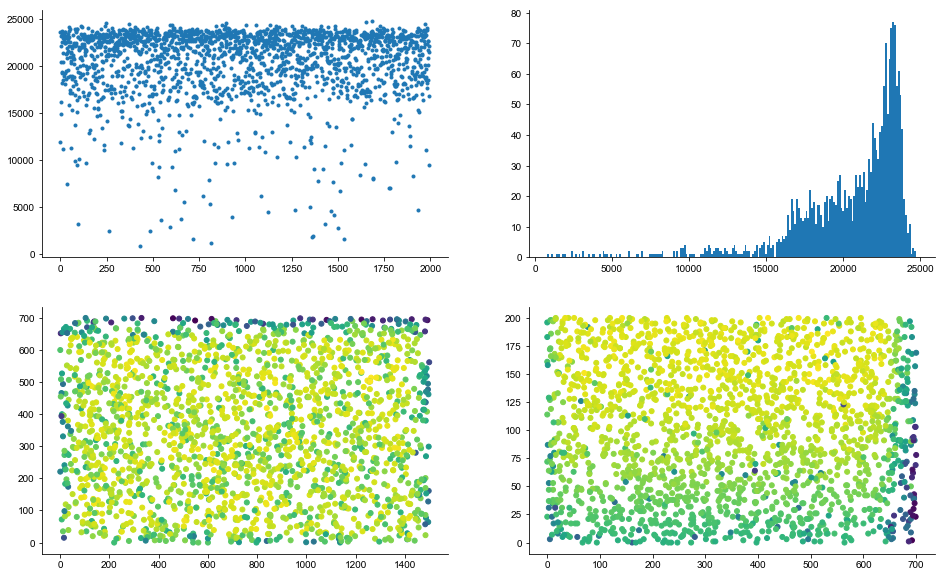

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_goc, '.')
_ = ax[0,1].hist(cons_per_goc, 200)
ax[1,0].scatter(gocxy[:,0], gocxy[:,1], 100, cons_per_goc, '.')
ax[1,1].scatter(gocxy[:,1], gocxy[:,2], 100, cons_per_goc, '.')

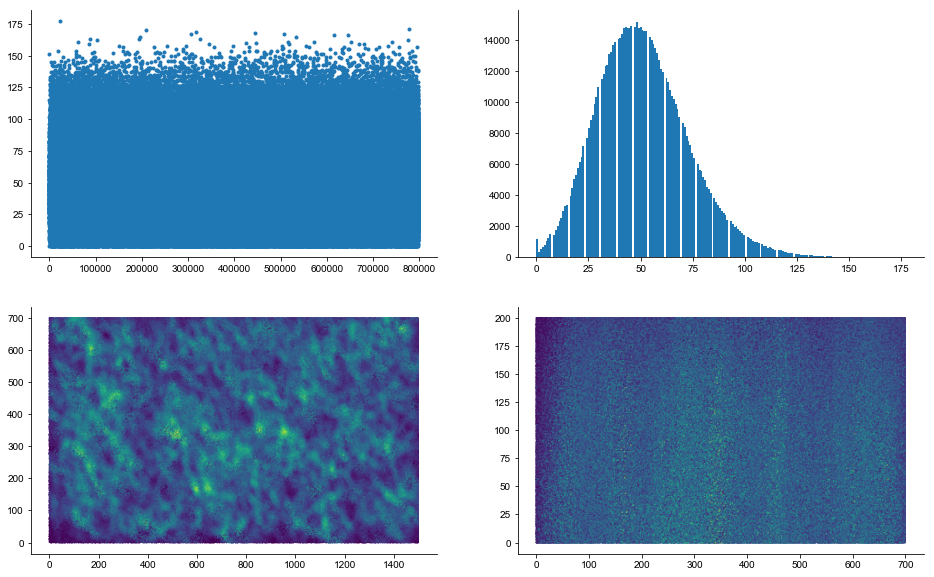

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_pf, '.')
_ = ax[0,1].hist(cons_per_pf, 200)
ax[1,0].scatter(grcxy[:,0], grcxy[:,1], 0.5, cons_per_pf, '.')
ax[1,1].scatter(grcxy[:,1], grcxy[:,2], 0.5, cons_per_pf, '.')

## Again the BREP outputs

In [16]:
output_path = Path('/Users/shhong/Dropbox/network_data/output_brep')

srcs = np.load(output_path / 'AAtoGoCsources.npy')
tgts = np.load(output_path / 'AAtoGoCtargets.npy')

grcxy = np.loadtxt(output_path / 'GCcoordinates.sorted.dat')
gocxy = np.loadtxt(output_path / 'GoCcoordinates.sorted.dat')

df = dd.from_array(np.vstack((srcs, tgts)).T, columns=('src', 'tgt'))


cons_per_goc = df.groupby('tgt').count().compute()
cons_per_pf = df.groupby('src').count().compute()

cons_per_goc = convert_from_dd(cons_per_goc.src)
cons_per_pf = convert_from_dd(cons_per_pf.tgt)

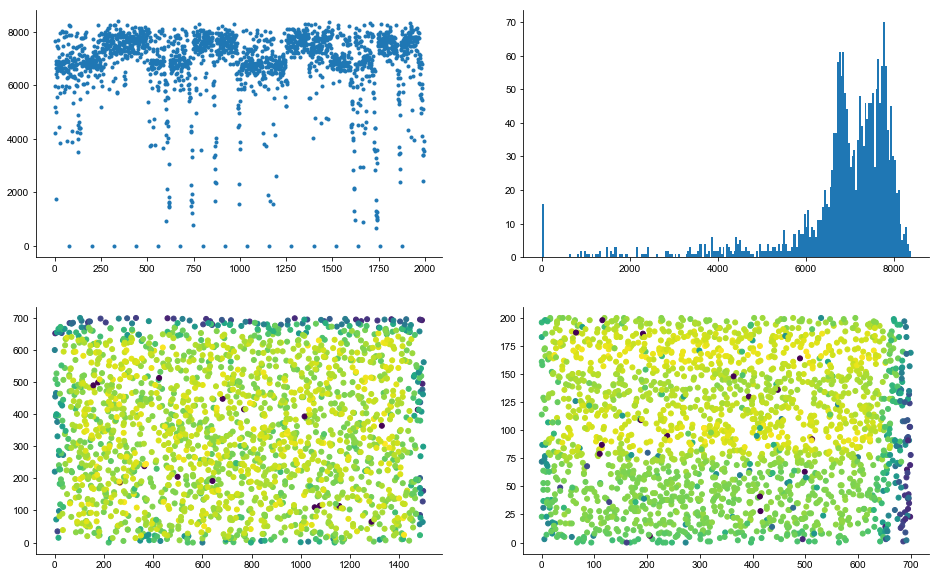

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_goc, '.')
_ = ax[0,1].hist(cons_per_goc, 200)
ax[1,0].scatter(gocxy[:,0], gocxy[:,1], 100, cons_per_goc, '.')
ax[1,1].scatter(gocxy[:,1], gocxy[:,2], 100, cons_per_goc, '.')

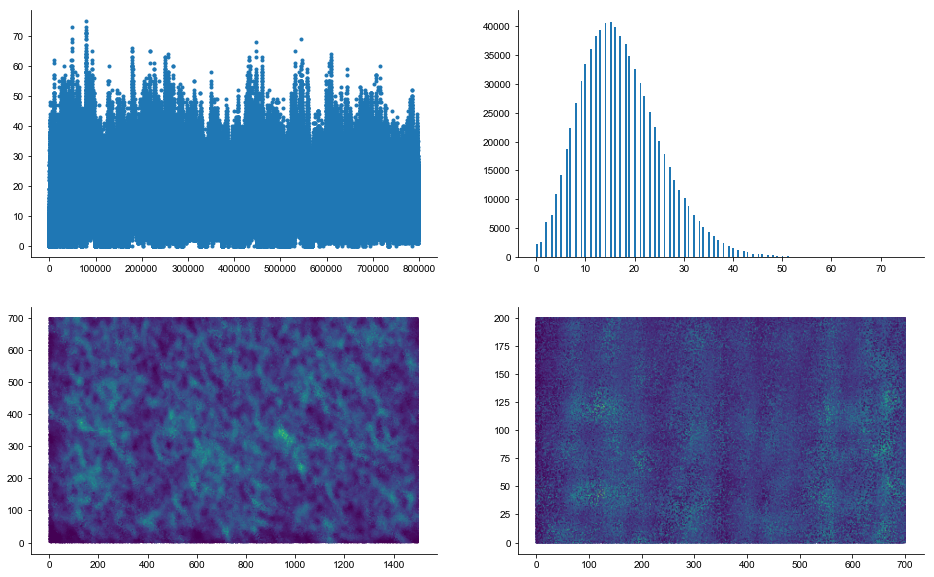

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_pf, '.')
_ = ax[0,1].hist(cons_per_pf, 200)
ax[1,0].scatter(grcxy[:,0], grcxy[:,1], 0.5, cons_per_pf, '.')
ax[1,1].scatter(grcxy[:,1], grcxy[:,2], 0.5, cons_per_pf, '.')